In [16]:
!pip install yfinance==0.1.63

You should consider upgrading via the 'C:\Users\14845\Documents\pyoptiontrador\venv_laptop\Scripts\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23920 sha256=7ff59d691914a02a477107e7dac7a89796ede628e96c093fd1eea965a9427ee0
  Stored in directory: c:\users\14845\appdata\local\pip\cache\wheels\44\19\52\4db92c8786b13e717b9664529da13bf8d7b74aff580ca64fc0
Successfully built yfinance
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.13
    Uninstalling yfinance-0.2.13:
      Successfully uninstalled yfinance-0.2.13


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
#import torch
import yfinance as yf

In [35]:
class Stonk():
    def __init__(self, ticker):
        dt_now = pd.Timestamp.utcnow()
        self.ticker = ticker
        stock = yf.Ticker(ticker)

        end_date = datetime.now().strftime('%Y-%m-%d')
        stock_hist = yf.download(ticker, start='2010-01-01', end='2023-01-01', interval='1d', ignore_tz=False)

        stock_df = pd.DataFrame(stock_hist)
        stock_df.dropna(inplace = True, axis = 0)

        stock_df['pct_change'] = stock_df['Adj Close'].pct_change()*100
        stock_df['1W change'] = stock_df['Adj Close']

        for i in range(len(stock_df)):
            limit = len(stock_df) - 4
            if i < limit:
                stock_df['1W change'][i] = ((stock_df['Adj Close'][i+4] - stock_df['Adj Close'][i])/stock_df['Adj Close'][i])*100
            else:
                stock_df['1W change'][i] = None

        stock_df.dropna(inplace = True, axis = 0)

        self.data = stock_df

    def display(self, isweekly=False):
        if isweekly:
            self.data['1W change'].hist(bins = 50, figsize = (10,5))
            plt.xlabel(f'{self.ticker} Daily returns')
            plt.ylabel('Frequency')
            plt.show()
            #self.data['1W change '].iloc[0:].describe().astype(int)
        else:
            self.data['pct_change'].hist(bins = 50, figsize = (10,5)) 
            plt.xlabel(f'{self.ticker} Daily returns')
            plt.ylabel('Frequency')
            plt.show()
            self.data['pct_change'].iloc[0:].describe().astype(int)
        #satistics

    
    #get confidence interval for percent changes
    def CI(self, conf=0.9):
        data = self.data['pct_change']
        #interval = st.norm.interval(alpha=conf, loc=np.mean(data), scale=st.sem(data))
        #interval = st.t.interval(alpha=conf, df=len(self.data['pct_change'])-1, loc=np.mean(self.data['pct_change']), scale=st.sem(self.data['pct_change']))
        interval = st.norm.interval(alpha=conf, loc=np.median(data), scale=1)
        return interval
    
    def weeklyCI(self, conf=0.9):
        data = self.data['1W change']
        #interval = st.norm.interval(alpha=conf, loc=np.mean(data), scale=st.sem(data))
        #interval = st.t.interval(alpha=conf, df=len(self.data['pct_change'])-1, loc=np.mean(self.data['pct_change']), scale=st.sem(self.data['pct_change']))
        interval = st.norm.interval(alpha=conf, loc=np.median(data), scale=1)
        return interval

    def plot6MweeklyCI(self, conf=0.9):
        conf_intervals = []
        for i in range(0,len(self.data)):
          data = self.data['1W change'][i:26+i]
          interval = st.norm.interval(alpha=conf, loc=np.median(data), scale=1)
          # print(str(interval))
          conf_intervals.append([interval])

        x = np.arange(0,len(self.data), 1)
        plt.plot(x, conf_intervals[0], label='Interval Lower')
        plt.plot(x, conf_intervals[1], label='Interval Upper')
        # plt.plot(x, BS_prices, label='BS')
        plt.title('Interval over Time')
        plt.legend()
        plt.show()


In [36]:
#table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table=pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components')
df = table[1]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

df = df['Symbol']

df.dropna(inplace=True, axis=0)

In [37]:
stock = Stonk('SPY')
stock.data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume,pct_change,1W change
Date,,,,,,,,


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MMM: No data found for this date range, symbol may be delisted


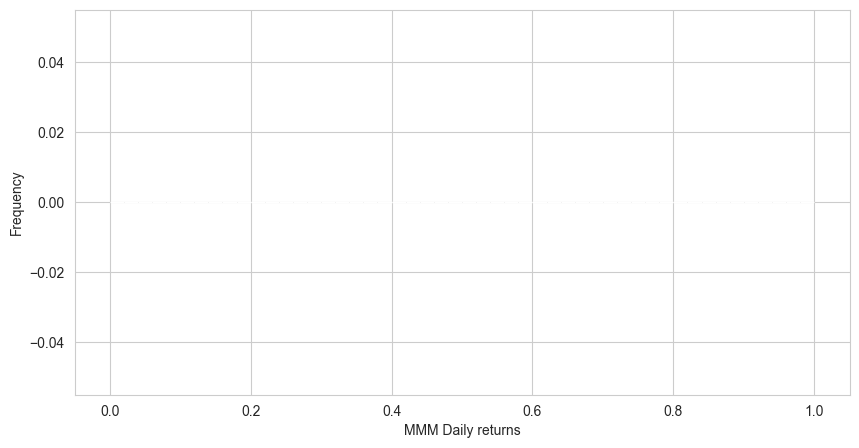

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AXP: No data found for this date range, symbol may be delisted


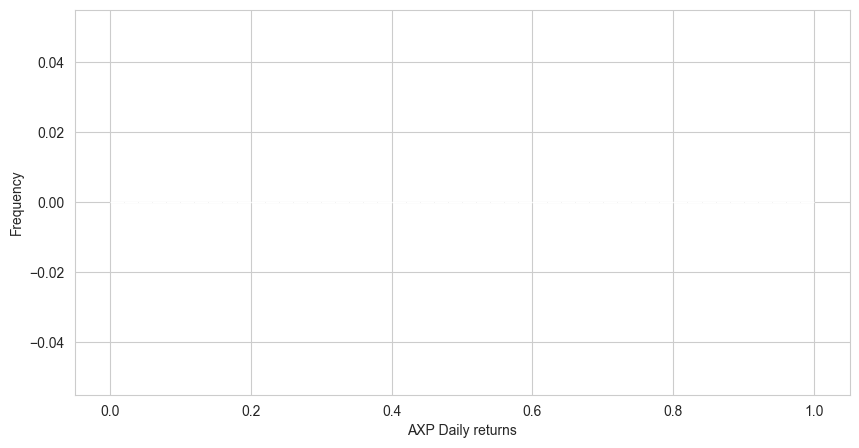

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMGN: No data found for this date range, symbol may be delisted


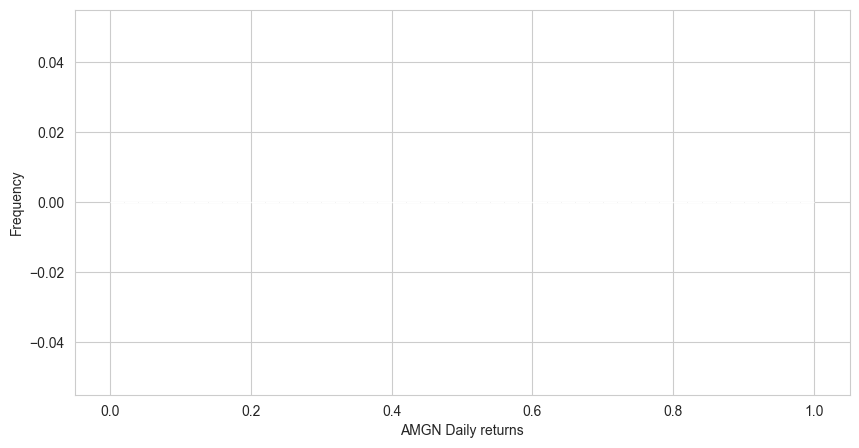

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: No data found for this date range, symbol may be delisted


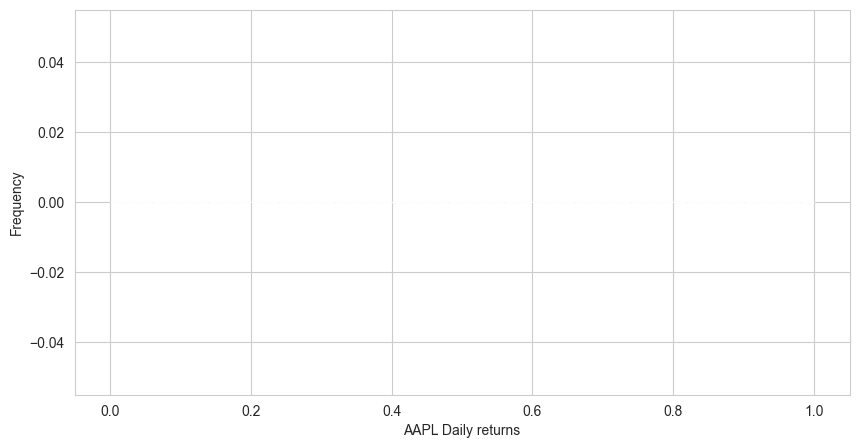

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BA: No data found for this date range, symbol may be delisted


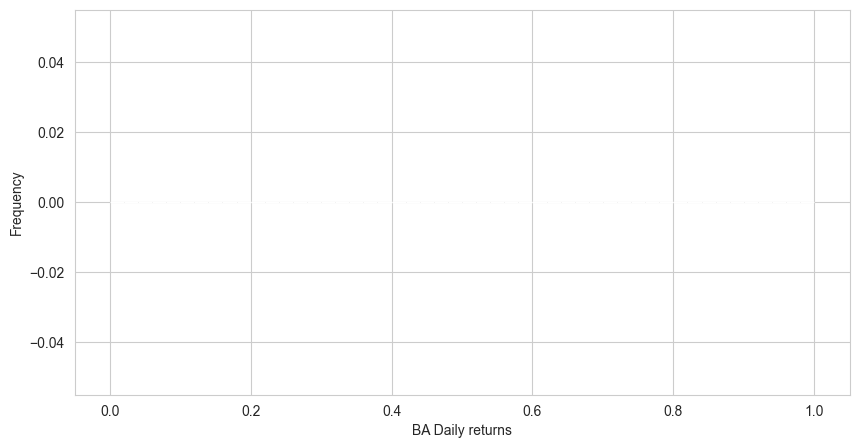

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CAT: No data found for this date range, symbol may be delisted


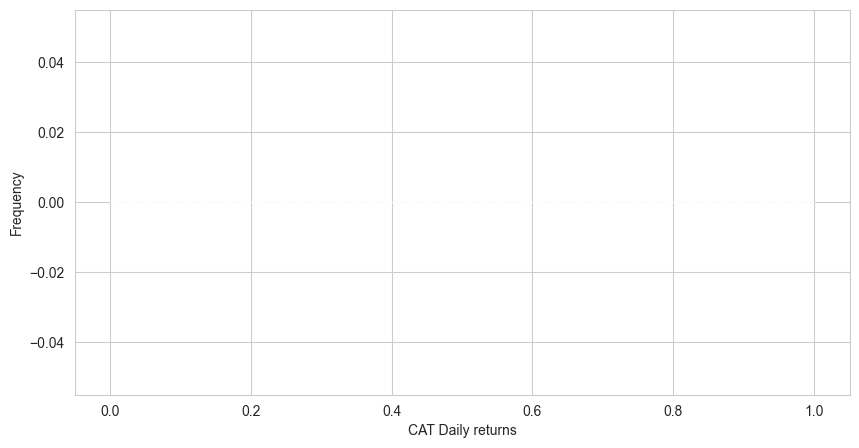

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CVX: No data found for this date range, symbol may be delisted


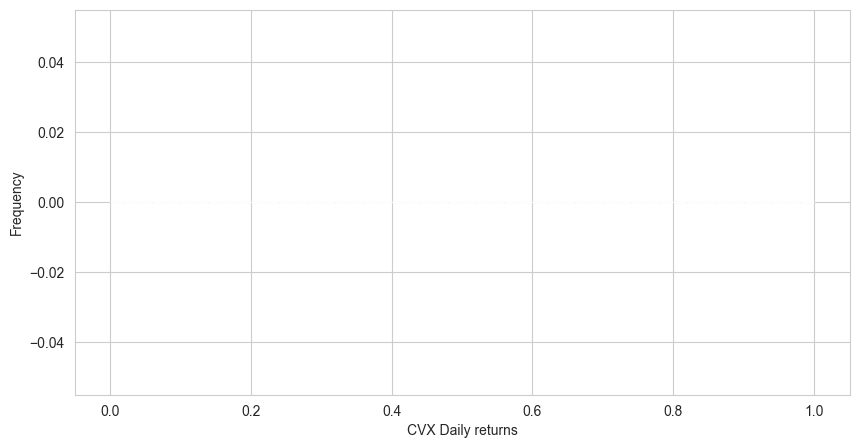

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CSCO: No data found for this date range, symbol may be delisted


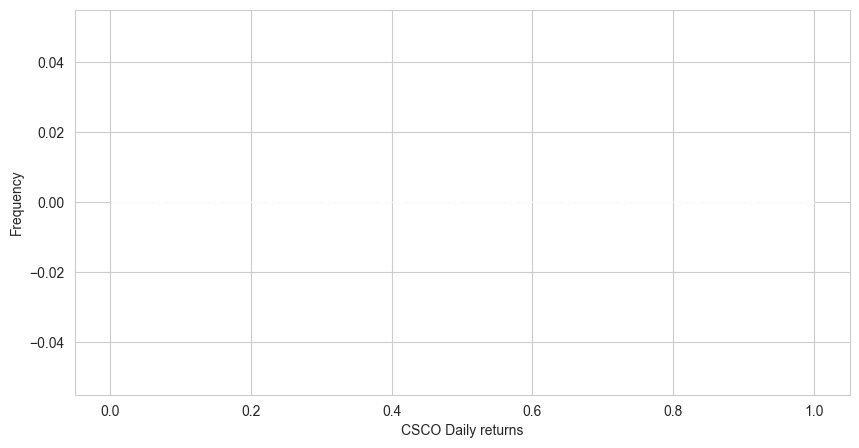

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KO: No data found for this date range, symbol may be delisted


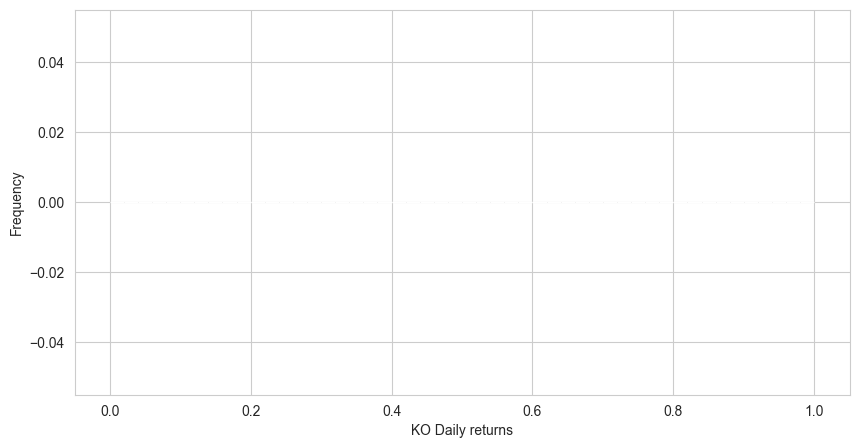

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DIS: No data found for this date range, symbol may be delisted


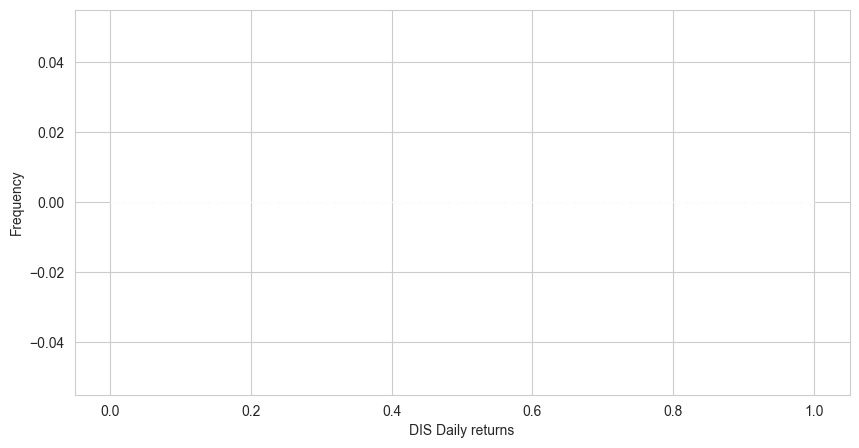

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DOW: No data found for this date range, symbol may be delisted


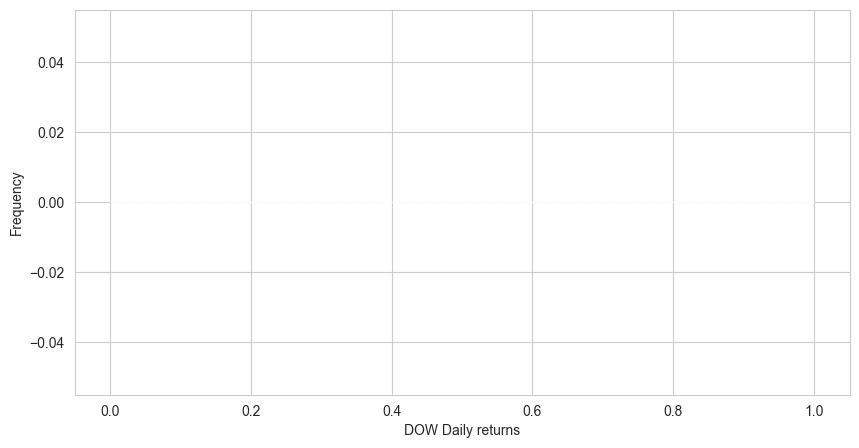

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GS: No data found for this date range, symbol may be delisted


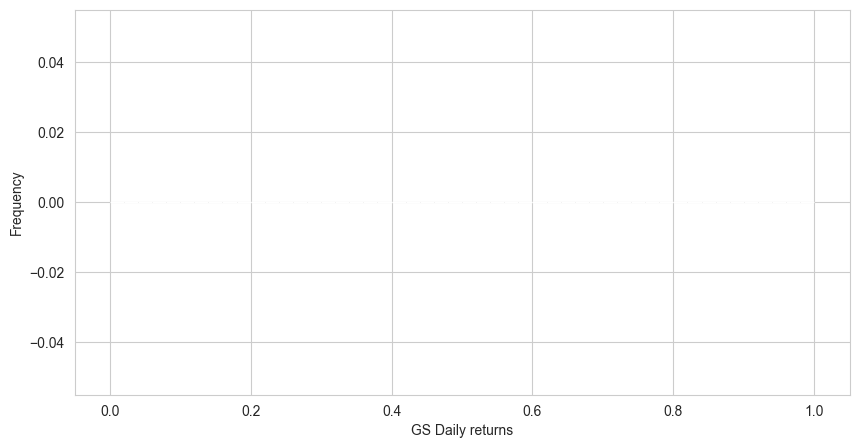

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HD: No data found for this date range, symbol may be delisted


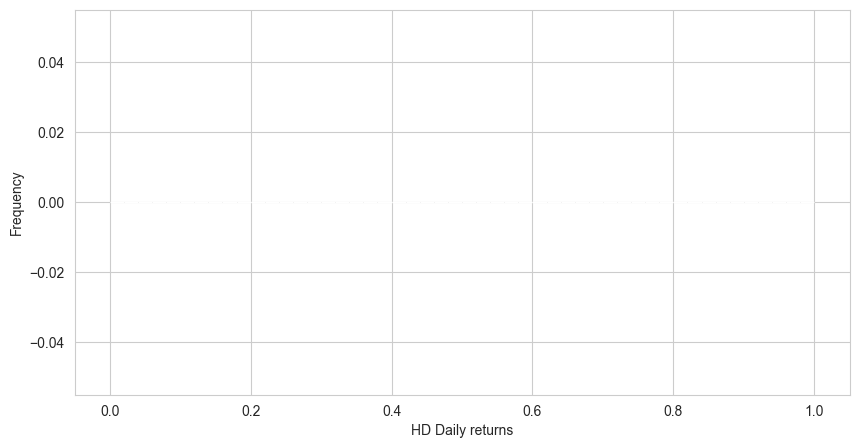

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HON: No data found for this date range, symbol may be delisted


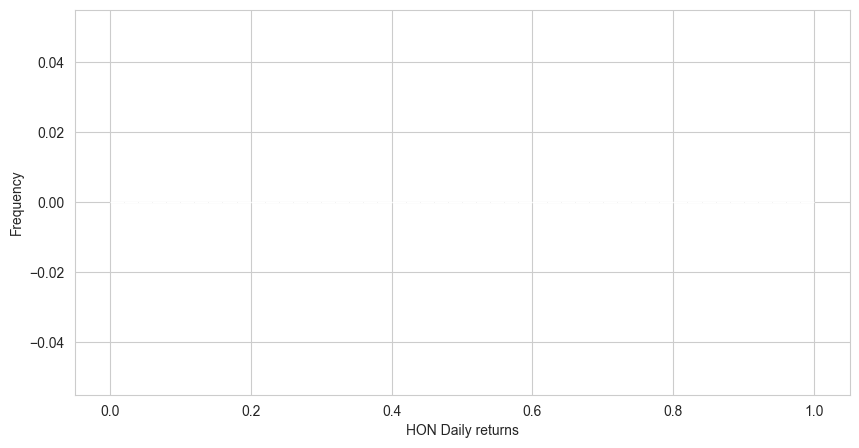

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- IBM: No data found for this date range, symbol may be delisted


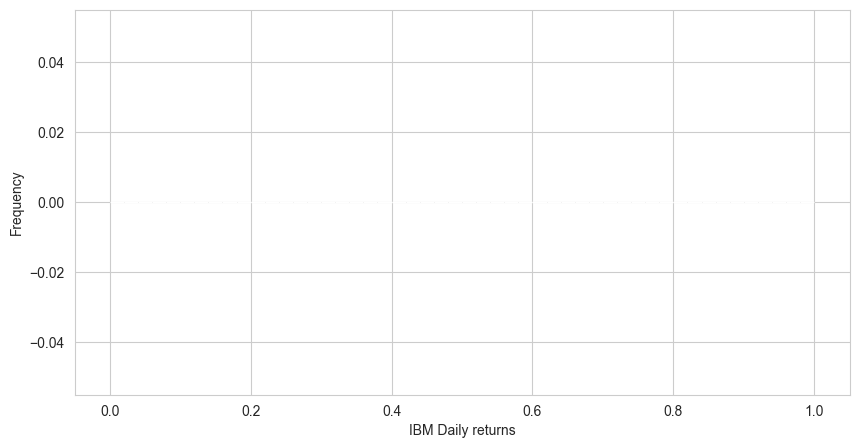

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- INTC: No data found for this date range, symbol may be delisted


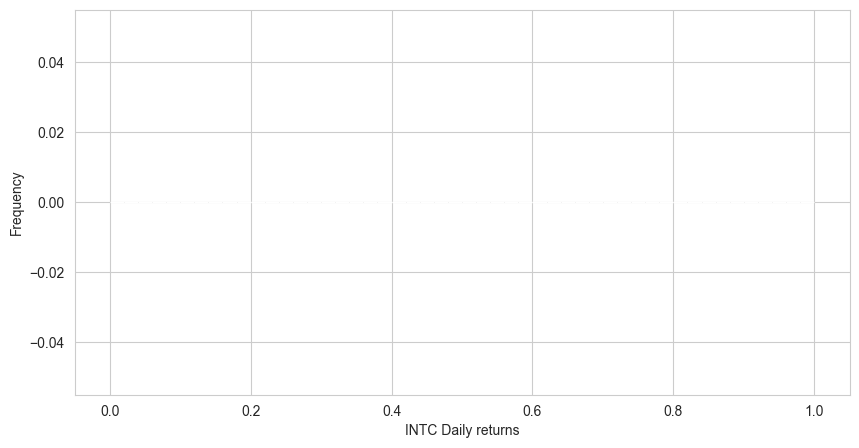

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JNJ: No data found for this date range, symbol may be delisted


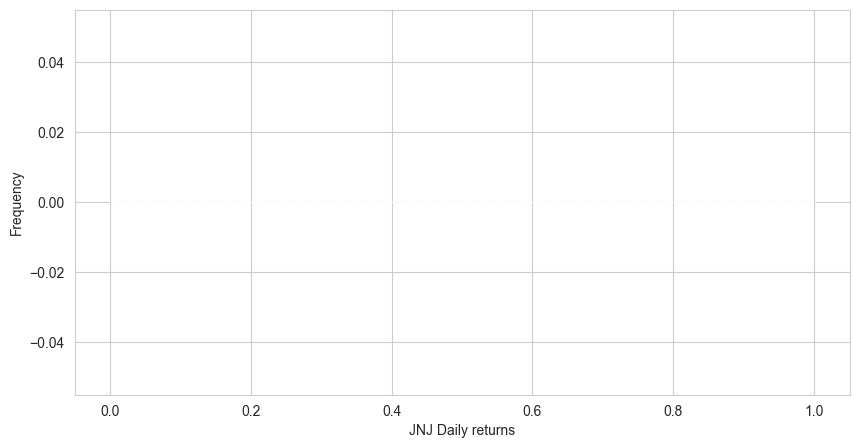

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


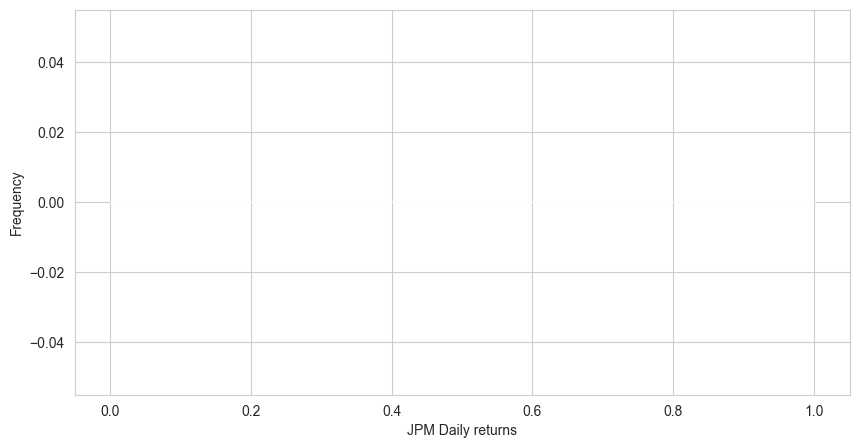

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MCD: No data found for this date range, symbol may be delisted


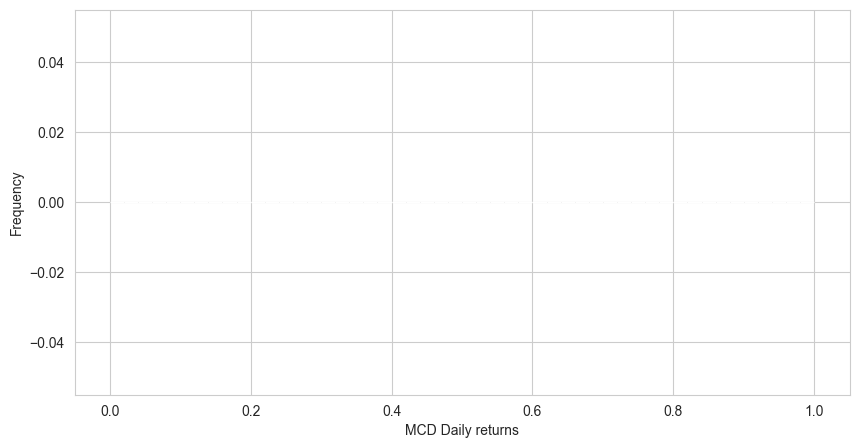

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MRK: No data found for this date range, symbol may be delisted


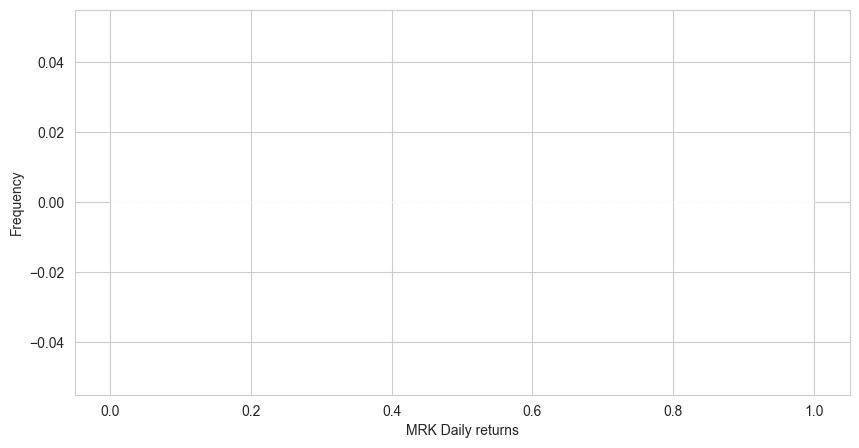

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MSFT: No data found for this date range, symbol may be delisted


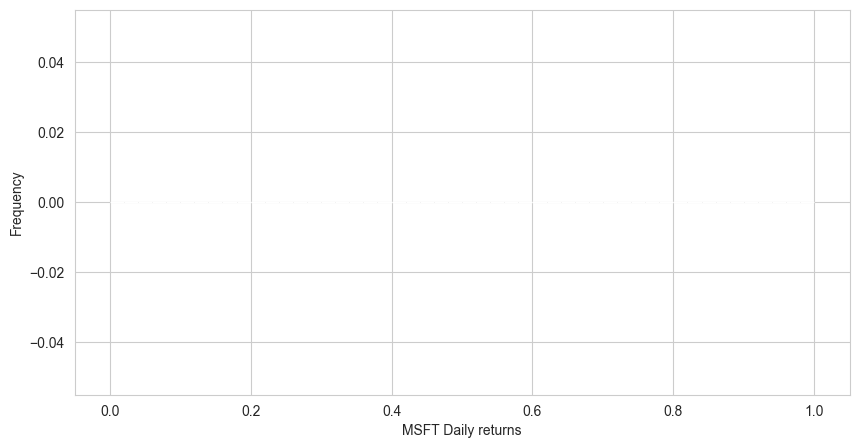

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NKE: No data found for this date range, symbol may be delisted


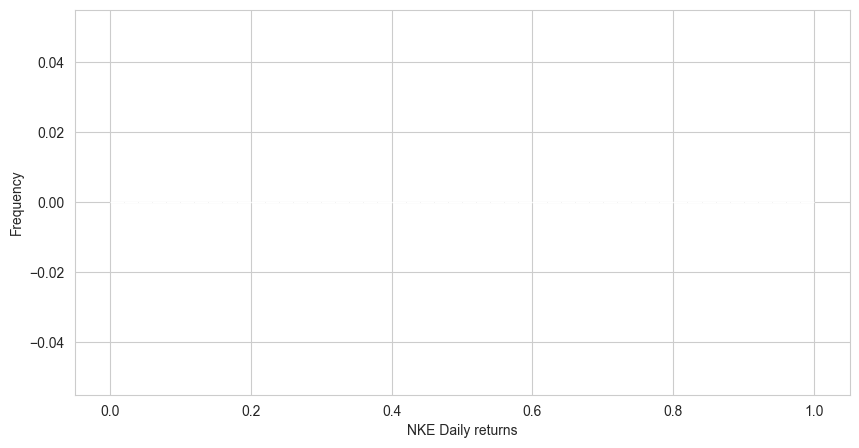

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PG: No data found for this date range, symbol may be delisted


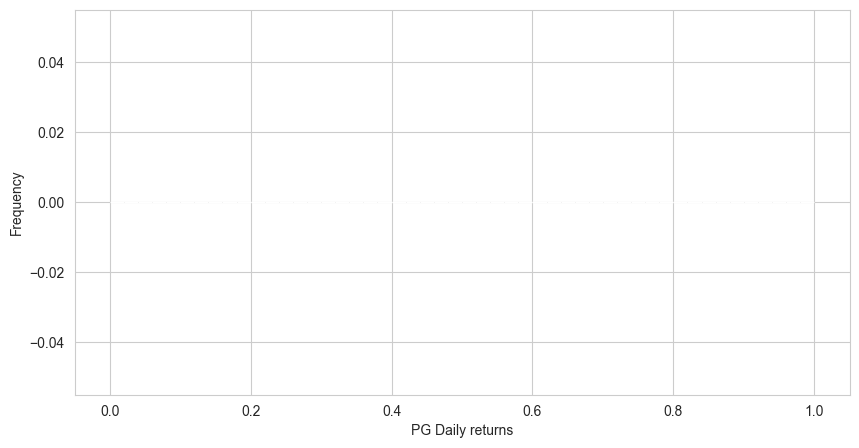

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CRM: No data found for this date range, symbol may be delisted


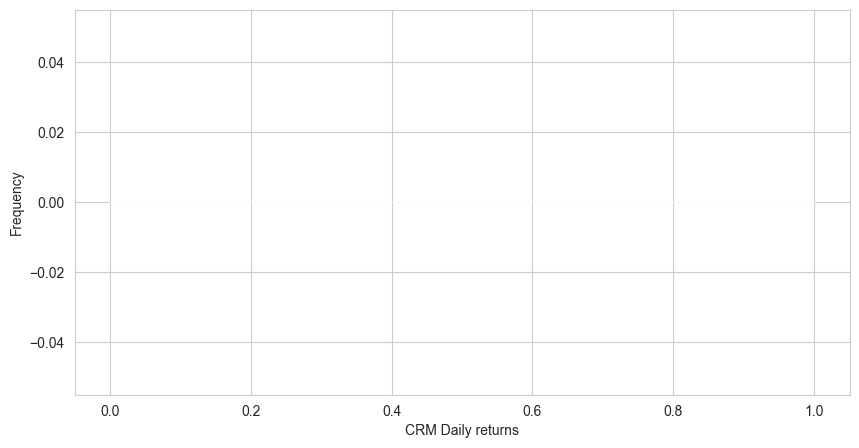

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TRV: No data found for this date range, symbol may be delisted


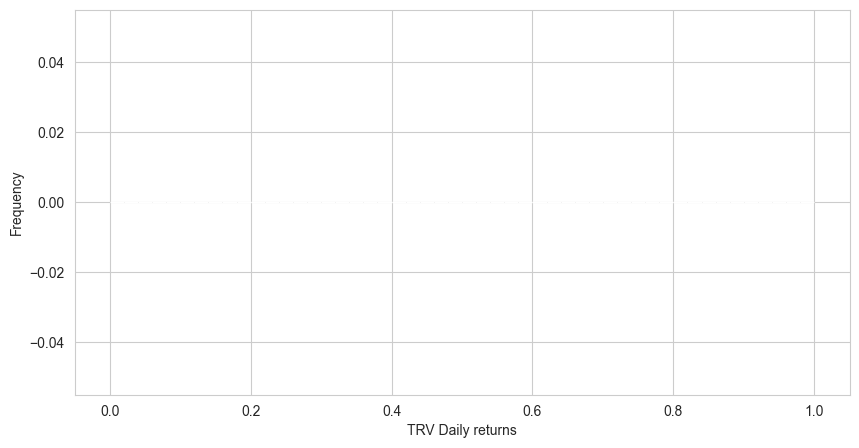

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- UNH: No data found for this date range, symbol may be delisted


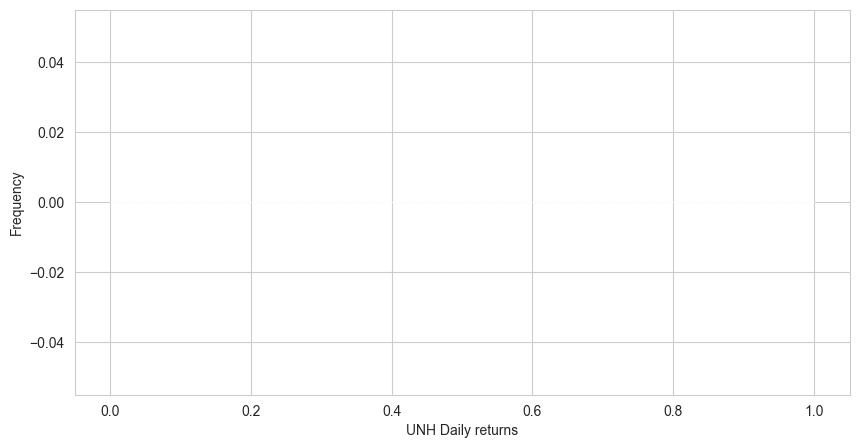

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VZ: No data found for this date range, symbol may be delisted


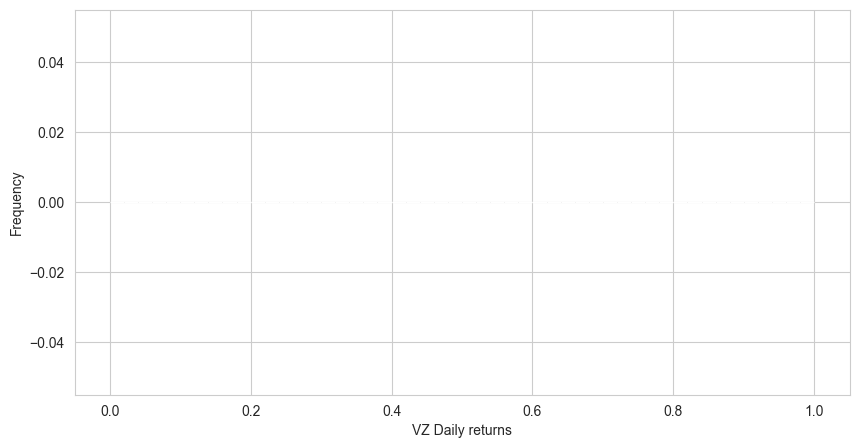

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- V: No data found for this date range, symbol may be delisted


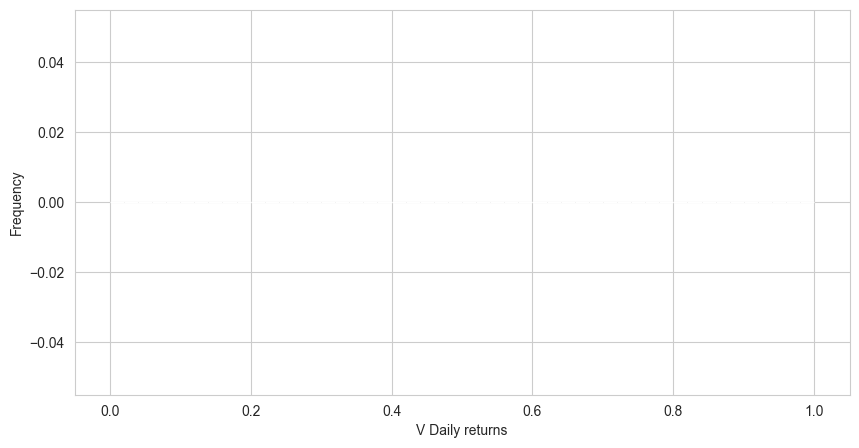

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WBA: No data found for this date range, symbol may be delisted


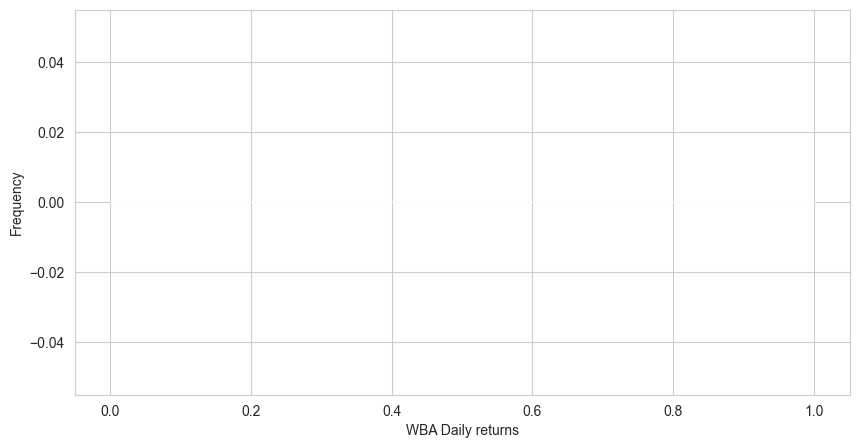

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WMT: No data found for this date range, symbol may be delisted


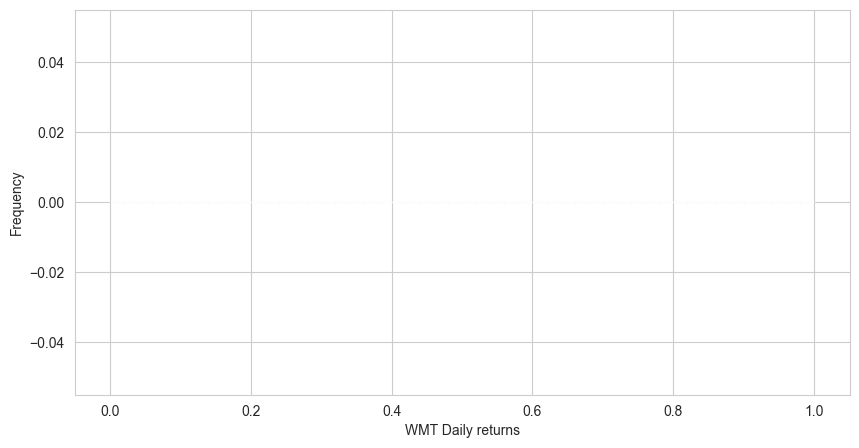

In [21]:
conf_intervals = []
confidence = .95
for ticker in df:
  #ticker = 'SPY'
  placeholder = Stonk(ticker)
  placeholder.display(isweekly=True)
  interval = placeholder.weeklyCI(confidence)
  conf_intervals.append([ticker, interval])

In [ ]:
tickers = ['SPY', 'QQQ']
for ticker in tickers:
  #ticker = 'SPY'
  placeholder = Stonk(ticker)
  placeholder.display()
  interval = placeholder.CI(confidence)
  conf_intervals.append([ticker, interval])

In [ ]:
print(f"{confidence}% Confidence Intervals for DOW30, and SPY+QQQ")
print()
conf_intervals

In [ ]:
placeholder.data

[*********************100%***********************]  1 of 1 completed


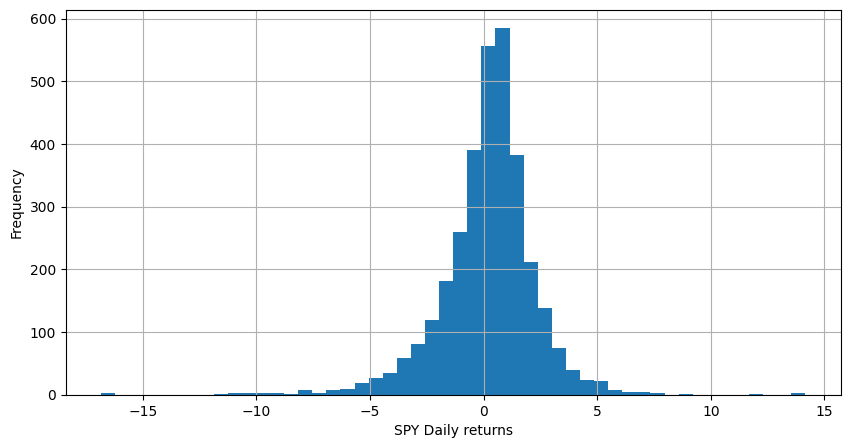

ValueError: ignored

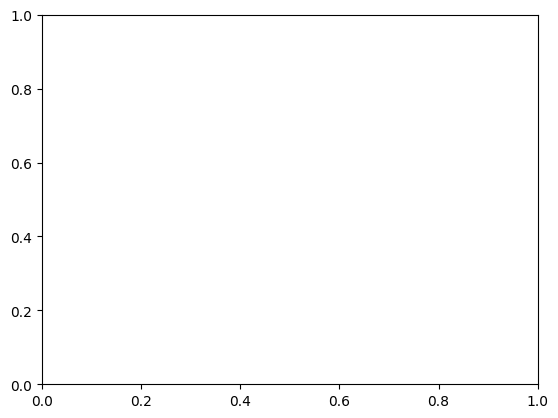

In [29]:
# conf_intervals = []
confidence = .95
# for ticker in df:
ticker = 'SPY'
placeholder = Stonk(ticker)
placeholder.display(isweekly=True)
placeholder.plot6MweeklyCI(confidence)
# interval = placeholder.weeklyCI(confidence)
# conf_intervals.append([ticker, interval])